In [2]:
import numpy as np
import pandas as pd

In [3]:
housing = pd.read_csv('C:/Users/Jacob/housing.csv')

In [4]:
housing.shape

(545, 13)

In [5]:
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


# Simple linear regression: yi=b0+b1∗xi+bias

In [6]:
housing.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [7]:
#cleansing data
housing.isnull().sum(axis=0)

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [8]:
b0 = 0.1 #intercept
b1 = 1000   #slope
housing['Prediction'] = b0 + b1*housing['area']

In [9]:
housing['Prediction_error'] = housing['price'] - housing['Prediction']

In [10]:
housing['Prediction_error'] #need to be squared

0      5879999.9
1      3289999.9
2      2289999.9
3      4714999.9
4      3989999.9
         ...    
540   -1180000.1
541    -632850.1
542   -1870000.1
543   -1160000.1
544   -2100000.1
Name: Prediction_error, Length: 545, dtype: float64

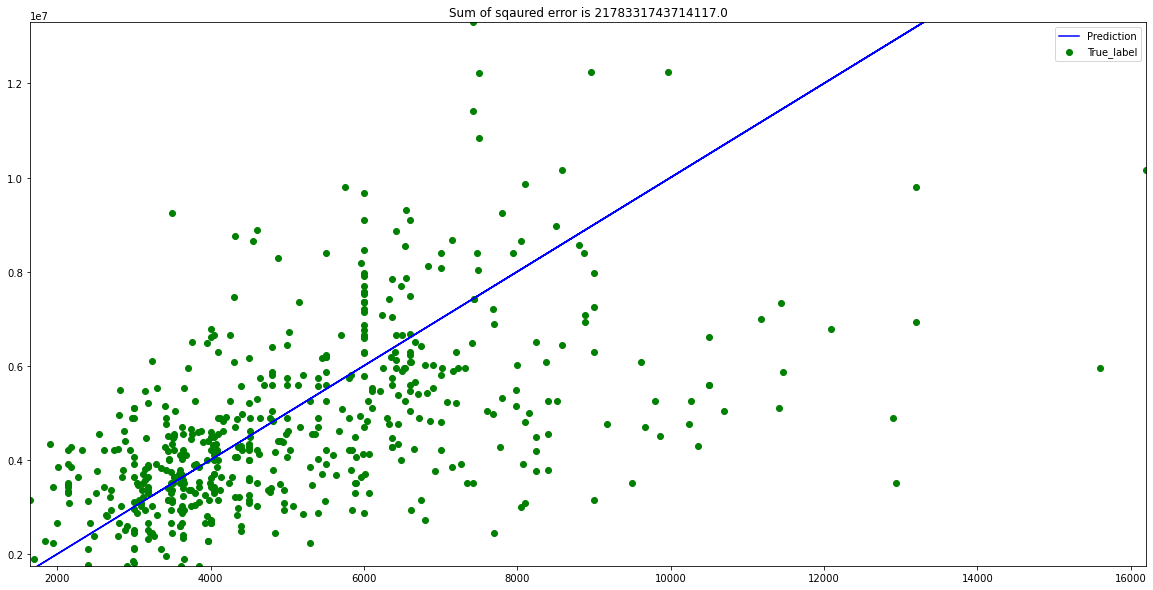

In [11]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20, 10))
plt.title('Sum of sqaured error is {}'.format((((housing['Prediction_error'])**2)).sum()))
plt.scatter(housing['area'], housing['price'], color='g', label='True_label')
plt.plot(housing['area'], housing['Prediction'], color='b', label='Prediction')
plt.legend()
plt.xlim(housing['area'].min()-2, housing['area'].max()+2)
plt.ylim(housing['price'].min()-2, housing['price'].max()+2)
plt.show()

In [12]:
import statsmodels.formula.api as smf
model = smf.ols(formula = 'price~area', data=housing).fit()

In [13]:
model.params

Intercept    2.387308e+06
area         4.619749e+02
dtype: float64

In [14]:
b0_ols = model.params[0] #intercept
b1_ols = model.params[1] #slope

In [15]:
housing['Prediction_ols'] = b0_ols + b1_ols*housing['area']

In [16]:
housing['error_ols'] = housing['price'] - housing['Prediction_ols']

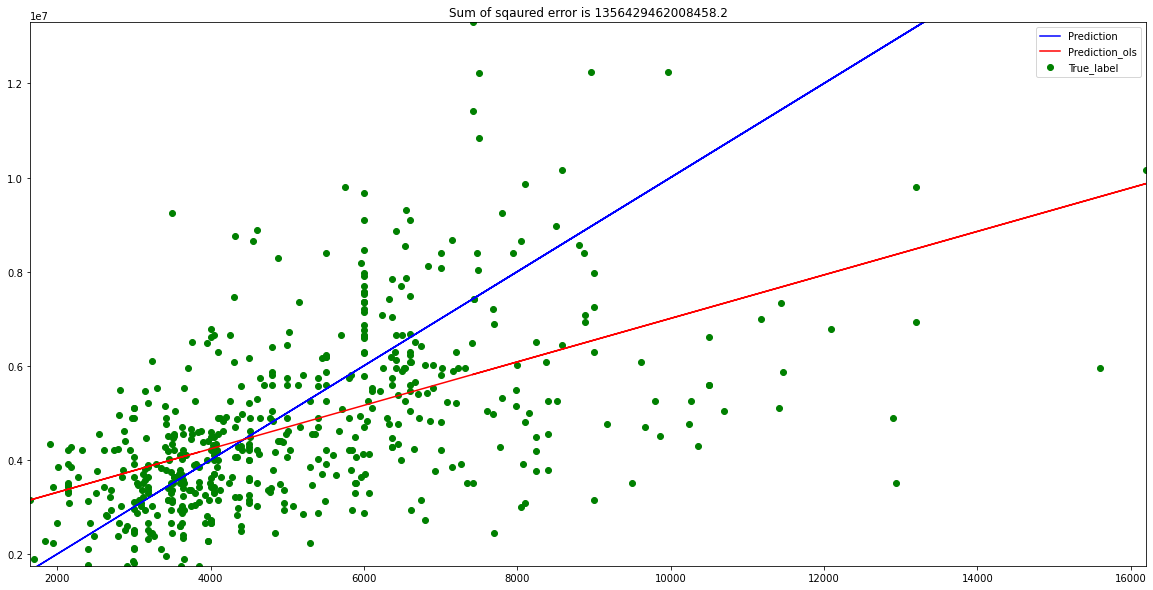

In [17]:
# plot your estimated line together with the points
plt.figure(figsize=(20, 10))
# See if the error drops after you use least square method
plt.title('Sum of sqaured error is {}'.format((((housing['error_ols'])**2)).sum()))
plt.scatter(housing['area'], housing['price'], color='g', label='True_label')
plt.plot(housing['area'], housing['Prediction'], color='b', label='Prediction')
plt.plot(housing['area'], housing['Prediction_ols'], color='r', label='Prediction_ols')
plt.legend()
plt.xlim(housing['area'].min()-2, housing['area'].max()+2)
plt.ylim(housing['price'].min()-2, housing['price'].max()+2)
plt.show()

In [18]:
##Refer to the P-value of housing['area'], Confidence Interval and R-square to evaluate the performance.
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.287
Model:                            OLS   Adj. R-squared:                  0.286
Method:                 Least Squares   F-statistic:                     218.9
Date:                Tue, 13 Oct 2020   Prob (F-statistic):           7.39e-42
Time:                        21:52:35   Log-Likelihood:                -8551.2
No. Observations:                 545   AIC:                         1.711e+04
Df Residuals:                     543   BIC:                         1.712e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2.387e+06   1.74e+05     13.681      0.000    2.04e+06    2.73e+06
area         461.9749     31.226     14.795      0.000     400.637     523.313
==============================================================================
Omnibus:                       92.668   Durbin-Watson:                   0.565
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              183.673
Skew:                           0.954   Prob(JB):                     1.31e-40
Kurtosis:                       5.108   Cond. No.                     1.44e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.44e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [19]:
#The Four Assumptions of Linear Regression -> https://www.statology.org/linear-regression-assumptions/
#what is qq plot? ->  https://www.itl.nist.gov/div898/handbook/eda/section3/qqplot.htm

## 1. Linearity

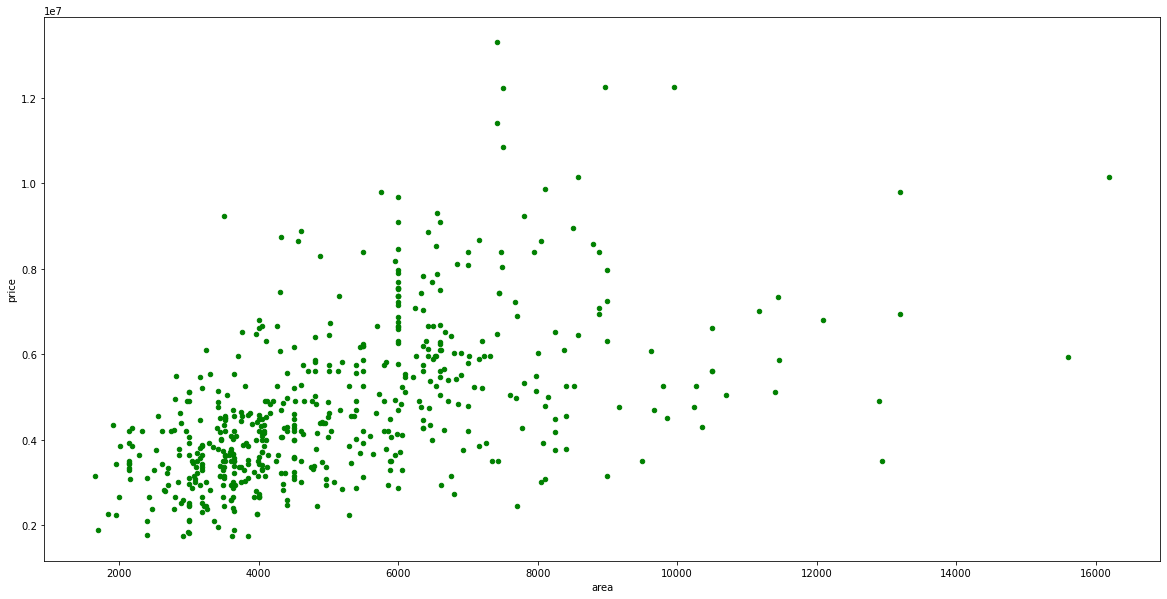

In [21]:
housing.plot(kind='scatter', x='area', y='price', figsize=(20, 10), color='g')

## 2. Indepedence(related to time series)

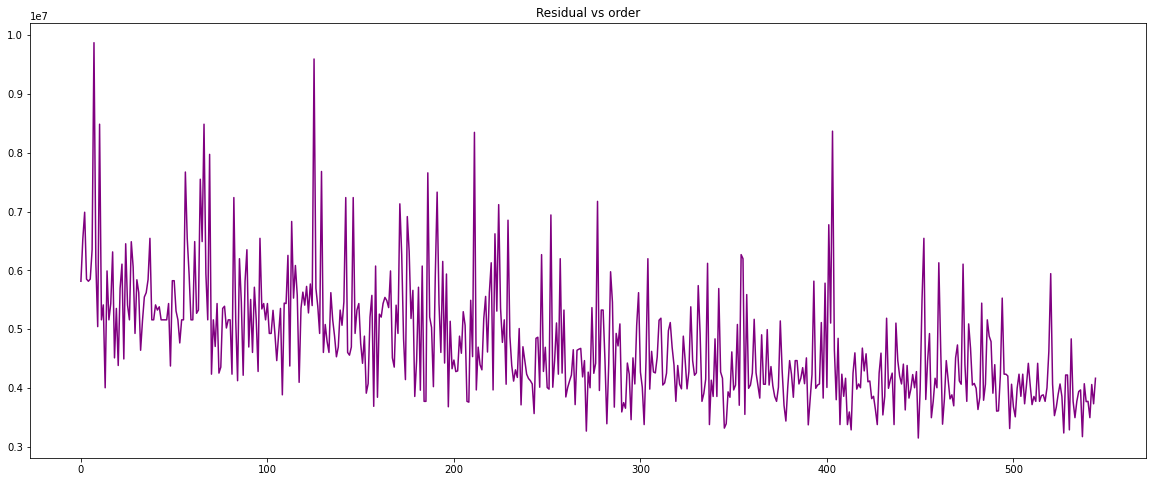

In [24]:
#method 1 to check
#Residual vs order plot
plt.figure(figsize=(20, 8))
plt.title('Residual vs order')
plt.plot(housing.index, housing['Prediction_ols'], color='purple')
##plt.axhline(y=0, color='red')
plt.show()


In [25]:
# Method 2: Durbin Watson Test
# Check the Durbin Watson Statistic
# Rule of thumb: test statistic value in the range of 1.5 to 2.5 are relatively normal
#model.summary() look the result from above

### 3. Normality

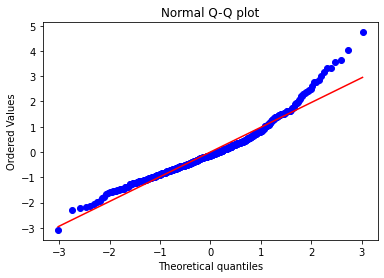

In [26]:
# check the quantile-quantile plot, it should be similar to the ref line, which means Normal distribution
import scipy.stats as stats
z = (housing['error_ols'] - housing['error_ols'].mean())/housing['error_ols'].std(ddof=1)

stats.probplot(z, dist='norm', plot=plt)
plt.title('Normal Q-Q plot')
plt.show()

## 4. Equal variance(Homoscedasticity)

In [27]:
#The residuals have constant variance at every level of x?

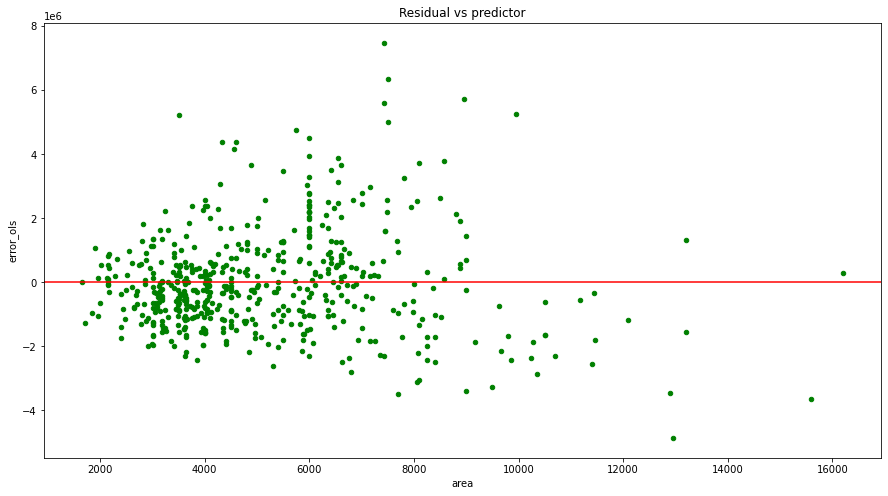

In [29]:
# Residual vs predictor plot
housing.plot(kind='scatter', x='area', y='error_ols', figsize=(15, 8), color='green')
plt.title('Residual vs predictor')
plt.axhline(y=0, color='red')
plt.show()

##  The regression model (price~area) violates all four assumptions. Therefore, we cannot make statistical inference using this model.

In [ ]:
#even if only one assumption is violated, we should not use that model